# Projet DATA731 - Analyses statistiques sur des données FOREX

> Un projet réalisé par : Christelle RANDRIAMAHEFA, Alaaeddine BESBES et Gaëtan BOUCHARD.
> Implémenté en Python.

Le dataset est extrait de données FOREX quotidiennes obtenues depuis le 1er janvier 2011 pour les monnaies suivantes. Il contient les valeurs de ses monnaies en USD.

On commence par importer les bibliothèques nécessaires à la réalisation du projet:

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import scipy.stats as stats
import seaborn as sn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
import sys
import scipy
import warnings
import sklearn
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pmdarima
from pmdarima.arima.utils import ndiffs
import csv 
warnings.filterwarnings("ignore")

Par souci de lisibilité, on décide d'ignorer les warnings (déprécation, etc).

In [274]:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

warnings.filterwarnings("ignore")


# Analyse globale du dataset

Avant d'entamer toute analyse graphique ou numérique, il faut se faire une première idée des données contenues dans le dataset et procéder à une vérification de sa conformité et de son intégrité.

Ouverture du dataset :

In [275]:
data = pd.read_csv('forex_usd_data.csv')

#Affichage du dataset brut
data

,date(y-m-d),Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,...,Sri Lankan Rupee,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar
0,2011-01-01,3.969000,0.977326,0.377050,6.472492,1.659500,1.284500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.934500,29.140000,30.020000,6.340000,1.537400,3.67310,0.640553,4.300000
1,2011-01-02,3.969000,0.977326,0.377050,6.472492,1.659500,1.283500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.933800,29.099001,30.020000,6.340000,1.537400,3.67310,0.641067,4.300000
2,2011-01-03,3.973500,0.980569,0.377055,6.472492,1.646288,1.284367,1.462799,0.990444,465.649994,...,110.919998,6.693788,0.933069,29.120000,30.084999,6.390000,1.557411,3.67320,0.645615,4.300000
3,2011-01-04,3.971000,0.995580,0.377060,6.480881,1.666747,1.287438,1.469525,0.999076,487.850006,...,110.820000,6.726967,0.947903,29.175004,30.104903,6.360000,1.547801,3.67315,0.641558,4.300000
4,2011-01-05,3.971500,0.999522,0.377050,6.548788,1.670312,1.291450,1.485031,0.994376,495.149993,...,110.820000,6.766127,0.964490,29.170000,30.216193,6.380000,1.543853,3.67310,0.645308,4.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,2022-01-05,103.144493,1.377400,0.376000,11.775196,5.683906,1.354650,1.725731,1.270036,837.658195,...,202.147771,9.064884,0.916121,27.603453,33.162219,6.792293,13.628157,3.67250,0.736803,459766.875884
4023,2022-01-06,103.220848,1.395432,0.376000,11.732685,5.702944,1.360617,1.729899,1.272432,836.567108,...,202.107817,9.135556,0.919641,27.682059,33.589961,6.780391,13.760202,3.67250,0.738716,459559.224730
4024,2022-01-07,103.285229,1.391949,0.376000,11.719453,5.628311,1.356006,1.722254,1.264538,830.039118,...,202.886810,9.062225,0.919196,27.679994,33.606164,6.797769,13.830054,3.67250,0.736299,460860.710532
4025,2022-01-08,103.192437,1.392482,0.376000,11.729349,5.636295,1.355453,1.721363,1.264463,828.357793,...,202.151224,9.065324,0.918368,27.624014,33.626684,6.807062,13.872557,3.67250,0.735840,462687.024400


On affiche les dix premières lignes afin d'avoir une première idée des données.

In [276]:
data.head(10)

,date(y-m-d),Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,...,Sri Lankan Rupee,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar
0,2011-01-01,3.9690,0.977326,0.377050,6.472492,1.659500,1.284500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.934500,29.140000,30.020000,6.34,1.537400,3.67310,0.640553,4.3
1,2011-01-02,3.9690,0.977326,0.377050,6.472492,1.659500,1.283500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.933800,29.099001,30.020000,6.34,1.537400,3.67310,0.641067,4.3
2,2011-01-03,3.9735,0.980569,0.377055,6.472492,1.646288,1.284367,1.462799,0.990444,465.649994,...,110.919998,6.693788,0.933069,29.120000,30.084999,6.39,1.557411,3.67320,0.645615,4.3
3,2011-01-04,3.9710,0.995580,0.377060,6.480881,1.666747,1.287438,1.469525,0.999076,487.850006,...,110.820000,6.726967,0.947903,29.175004,30.104903,6.36,1.547801,3.67315,0.641558,4.3
4,2011-01-05,3.9715,0.999522,0.377050,6.548788,1.670312,1.291450,1.485031,0.994376,495.149993,...,110.820000,6.766127,0.964490,29.170000,30.216193,6.38,1.543853,3.67310,0.645308,4.3
5,2011-01-06,3.9725,1.004114,0.377055,6.578948,1.688198,1.294907,1.500927,0.995765,495.350006,...,110.800003,6.859084,0.963382,29.270000,30.264999,6.33,1.553250,3.67315,0.645509,4.3
6,2011-01-07,3.9735,1.004783,0.377055,6.631300,1.686150,1.294726,1.511231,0.993527,497.649994,...,110.820000,6.902419,0.965455,29.357000,30.359801,6.33,1.572761,3.67310,0.642732,4.3
7,2011-01-08,3.9760,1.003210,0.377050,6.631300,1.683500,1.294500,1.514830,0.993000,497.500000,...,110.820000,6.937900,0.967200,29.360000,30.320000,6.33,1.571900,3.67300,0.643335,4.3
8,2011-01-09,3.9760,1.003512,0.377050,6.631300,1.683500,1.294500,1.514830,0.993300,497.500000,...,110.820000,6.933900,0.967200,29.360000,30.320000,6.33,1.571900,3.67300,0.643335,4.3
9,2011-01-10,3.9760,1.006770,0.377040,6.653360,1.693000,1.298848,1.511403,0.992724,498.750000,...,110.769997,6.881667,0.968713,29.268000,30.709919,6.33,1.580967,3.67315,0.641967,4.3


Par souci d'intégrité, il faut vérifier que le dataset ne comporte pas de données manquantes.

In [277]:
data.isnull().sum()

date(y-m-d)              0
Argentine Peso           0
Australian Dollar        0
Bahraini Dinar           0
Botswana Pula            0
Brazilian Real           0
Bruneian Dollar          0
Bulgarian Lev            0
Canadian Dollar          0
Chilean Peso             0
Chinese Yuan Renminbi    0
Colombian Peso           0
Croatian Kuna            0
Czech Koruna             0
Danish Krone             0
Euro                     0
Hong Kong Dollar         0
Hungarian Forint         0
Icelandic Krona          0
Indian Rupee             0
Indonesian Rupiah        0
Iranian Rial             0
Israeli Shekel           0
Japanese Yen             0
Kazakhstani Tenge        0
South Korean Won         0
Kuwaiti Dinar            0
Libyan Dinar             0
Malaysian Ringgit        0
Mauritian Rupee          0
Mexican Peso             0
Nepalese Rupee           0
New Zealand Dollar       0
Norwegian Krone          0
Omani Rial               0
Pakistani Rupee          0
Philippine Peso          0
P

Toutes les colonnes sont conformes, à part le Bolivar Vénézuélien, car la colonne comporte deux valeurs manquantes. Il faut donc réaliser un traitement sur le dataset pour éliminer les lignes correspondantes.

In [278]:
data = data[~data.iloc[:, -1].isnull()].copy()

#On revérifie qu'il n'y a plus de valeurs manquantes
data.isnull().sum()

date(y-m-d)              0
Argentine Peso           0
Australian Dollar        0
Bahraini Dinar           0
Botswana Pula            0
Brazilian Real           0
Bruneian Dollar          0
Bulgarian Lev            0
Canadian Dollar          0
Chilean Peso             0
Chinese Yuan Renminbi    0
Colombian Peso           0
Croatian Kuna            0
Czech Koruna             0
Danish Krone             0
Euro                     0
Hong Kong Dollar         0
Hungarian Forint         0
Icelandic Krona          0
Indian Rupee             0
Indonesian Rupiah        0
Iranian Rial             0
Israeli Shekel           0
Japanese Yen             0
Kazakhstani Tenge        0
South Korean Won         0
Kuwaiti Dinar            0
Libyan Dinar             0
Malaysian Ringgit        0
Mauritian Rupee          0
Mexican Peso             0
Nepalese Rupee           0
New Zealand Dollar       0
Norwegian Krone          0
Omani Rial               0
Pakistani Rupee          0
Philippine Peso          0
P

Pour être sûrs qu'il ne reste plus de ligne où les valeurs n'ont pas été renseignée, on affiche graphiquement le nombre de lignes NaN présentes.

<AxesSubplot:>

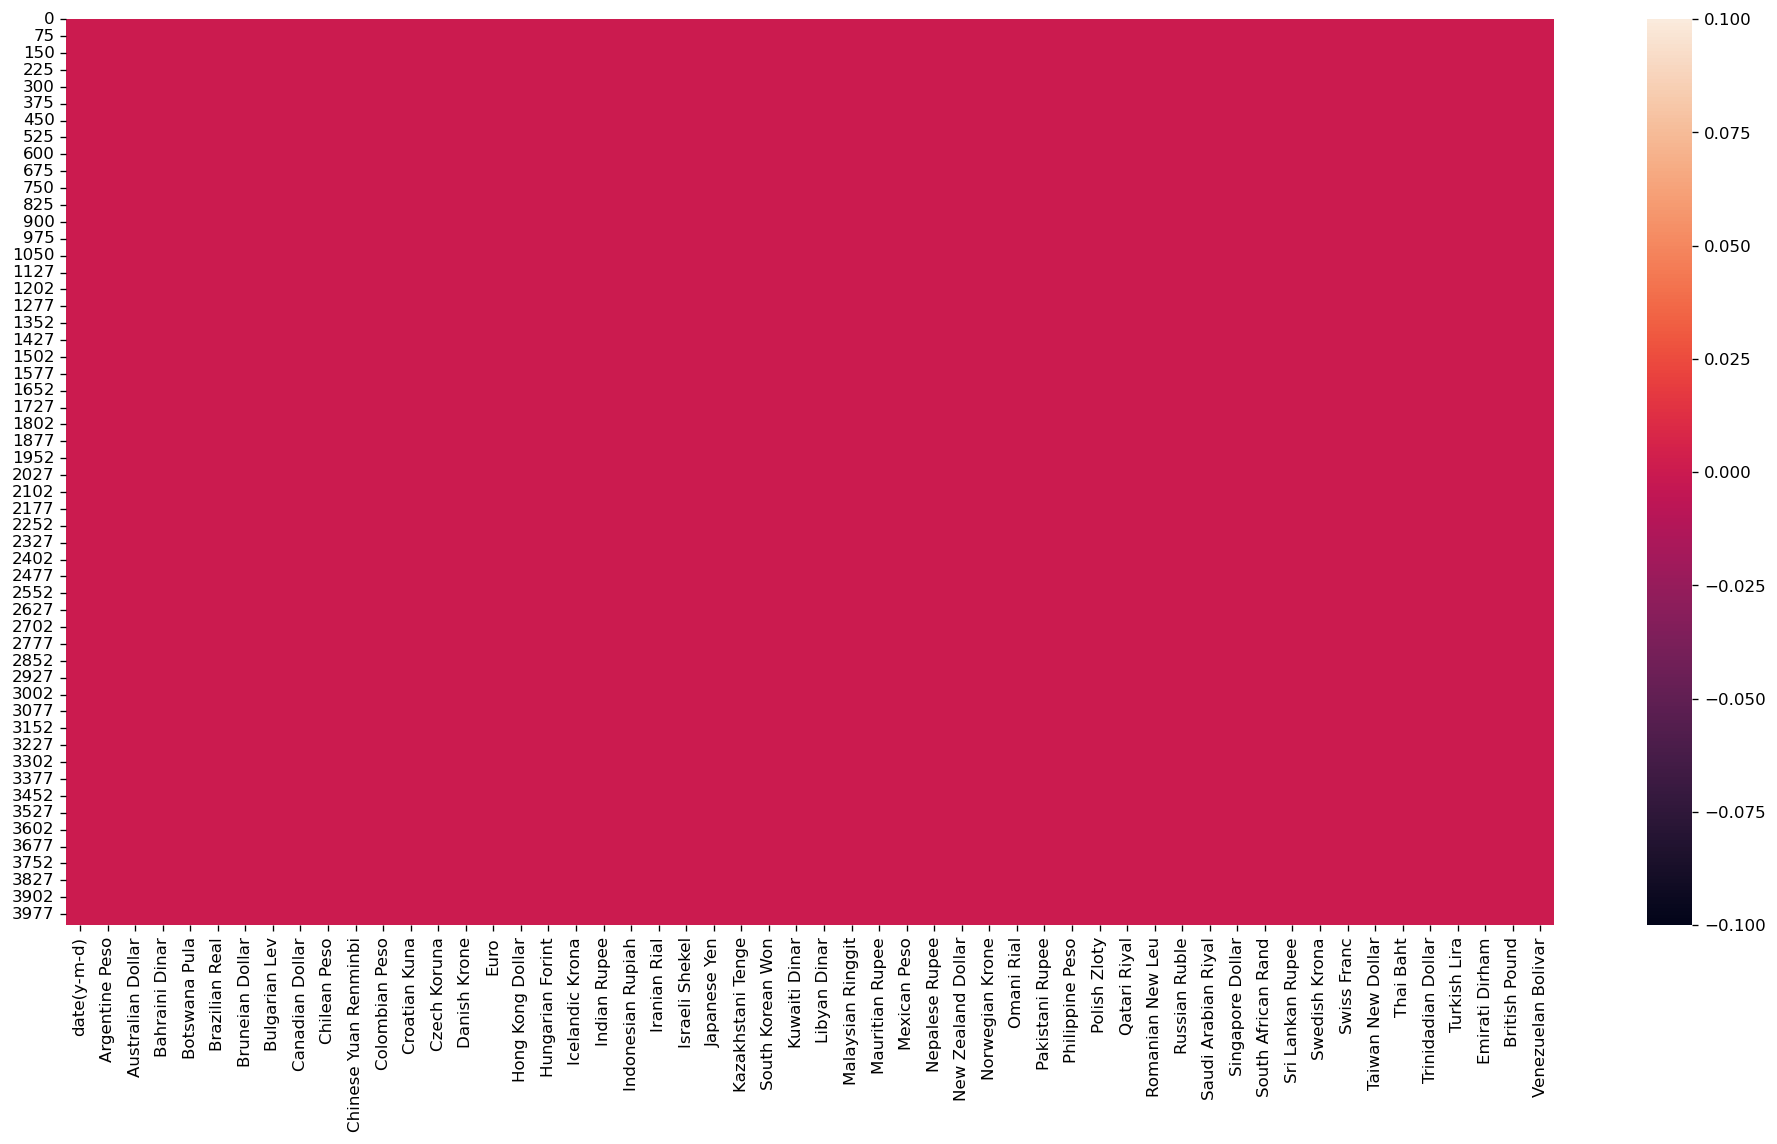

In [279]:
plt.figure(figsize=(20, 10))
sn.heatmap(data.isnull(), cbar=True)

Toutes les valeurs manquantes ont maintenant été gérées. On peut maintenant s'intéresser au type de données qu'on traite.

In [280]:
data.size #permet d'obtenir le nombre d'éléments que contient le dataset

217350

In [281]:
data.shape

(4025, 54)

<AxesSubplot:ylabel='None'>

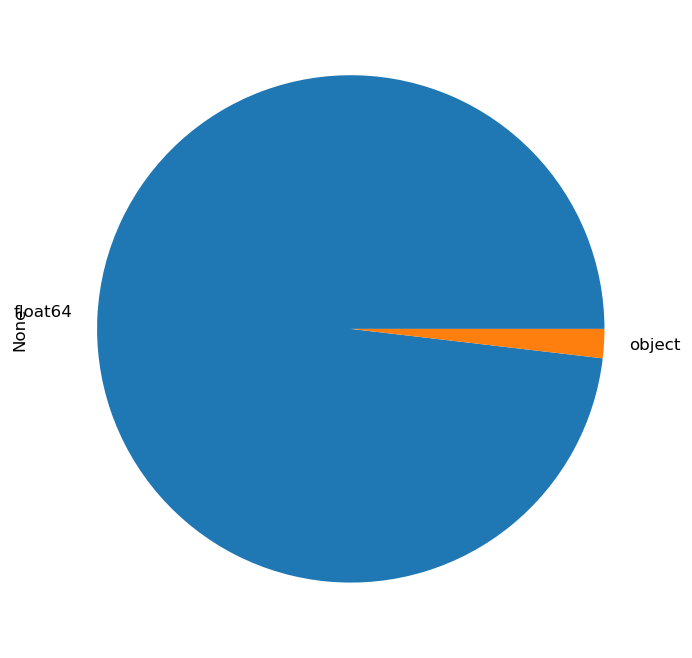

In [282]:
data.dtypes.value_counts().plot.pie()

Il est également intéressant d'afficher une visualisation numérique des données du dataset.

In [283]:
data.describe()

,Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,Chinese Yuan Renminbi,...,Sri Lankan Rupee,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar
count,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,...,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4.025000e+03
mean,27.892361,1.239292,0.376581,9.721374,3.306950,1.327230,1.628648,1.204216,628.975244,6.513357,...,150.805754,8.016206,0.947567,30.170441,32.263933,6.570500,3.970245,3.672826,0.701452,1.610403e+10
std,29.732671,0.180890,0.001274,1.475142,1.201868,0.060237,0.137156,0.138987,106.981115,0.291296,...,26.765588,1.110342,0.043451,1.251927,1.734233,0.194131,2.414256,0.000349,0.070380,7.271978e+10
min,3.969000,0.907009,0.352206,6.365372,1.534021,1.201029,1.314964,0.944200,455.149994,6.041239,...,109.269997,6.000269,0.729577,27.538020,28.667126,6.079999,1.510495,3.671001,0.582527,4.300000e+00
25%,5.801502,1.067558,0.376000,8.646797,2.224179,1.267701,1.500000,1.046887,517.750000,6.260067,...,130.649957,6.724665,0.917086,29.413728,30.887541,6.380000,2.004656,3.672500,0.635745,6.287699e+00
50%,14.912000,1.302860,0.376979,10.294532,3.239985,1.346179,1.656898,1.263332,647.990020,6.466564,...,145.899994,8.364248,0.953081,30.098166,31.946948,6.654496,2.983793,3.672900,0.706746,9.949813e+00
75%,41.882490,1.378220,0.377048,10.835845,3.968900,1.369473,1.744150,1.317425,698.949575,6.745426,...,177.169977,8.838959,0.982893,30.888119,33.215247,6.760500,5.707952,3.673050,0.766257,9.987500e+00
max,103.290000,1.739537,0.378606,12.286646,5.923027,1.460292,1.884170,1.458843,873.069028,7.178185,...,203.138820,10.367381,1.033671,33.795374,36.490096,6.837211,18.177387,3.675145,0.869677,4.282961e+11


Matrice de corrélation de quelques monnaies du dataset :

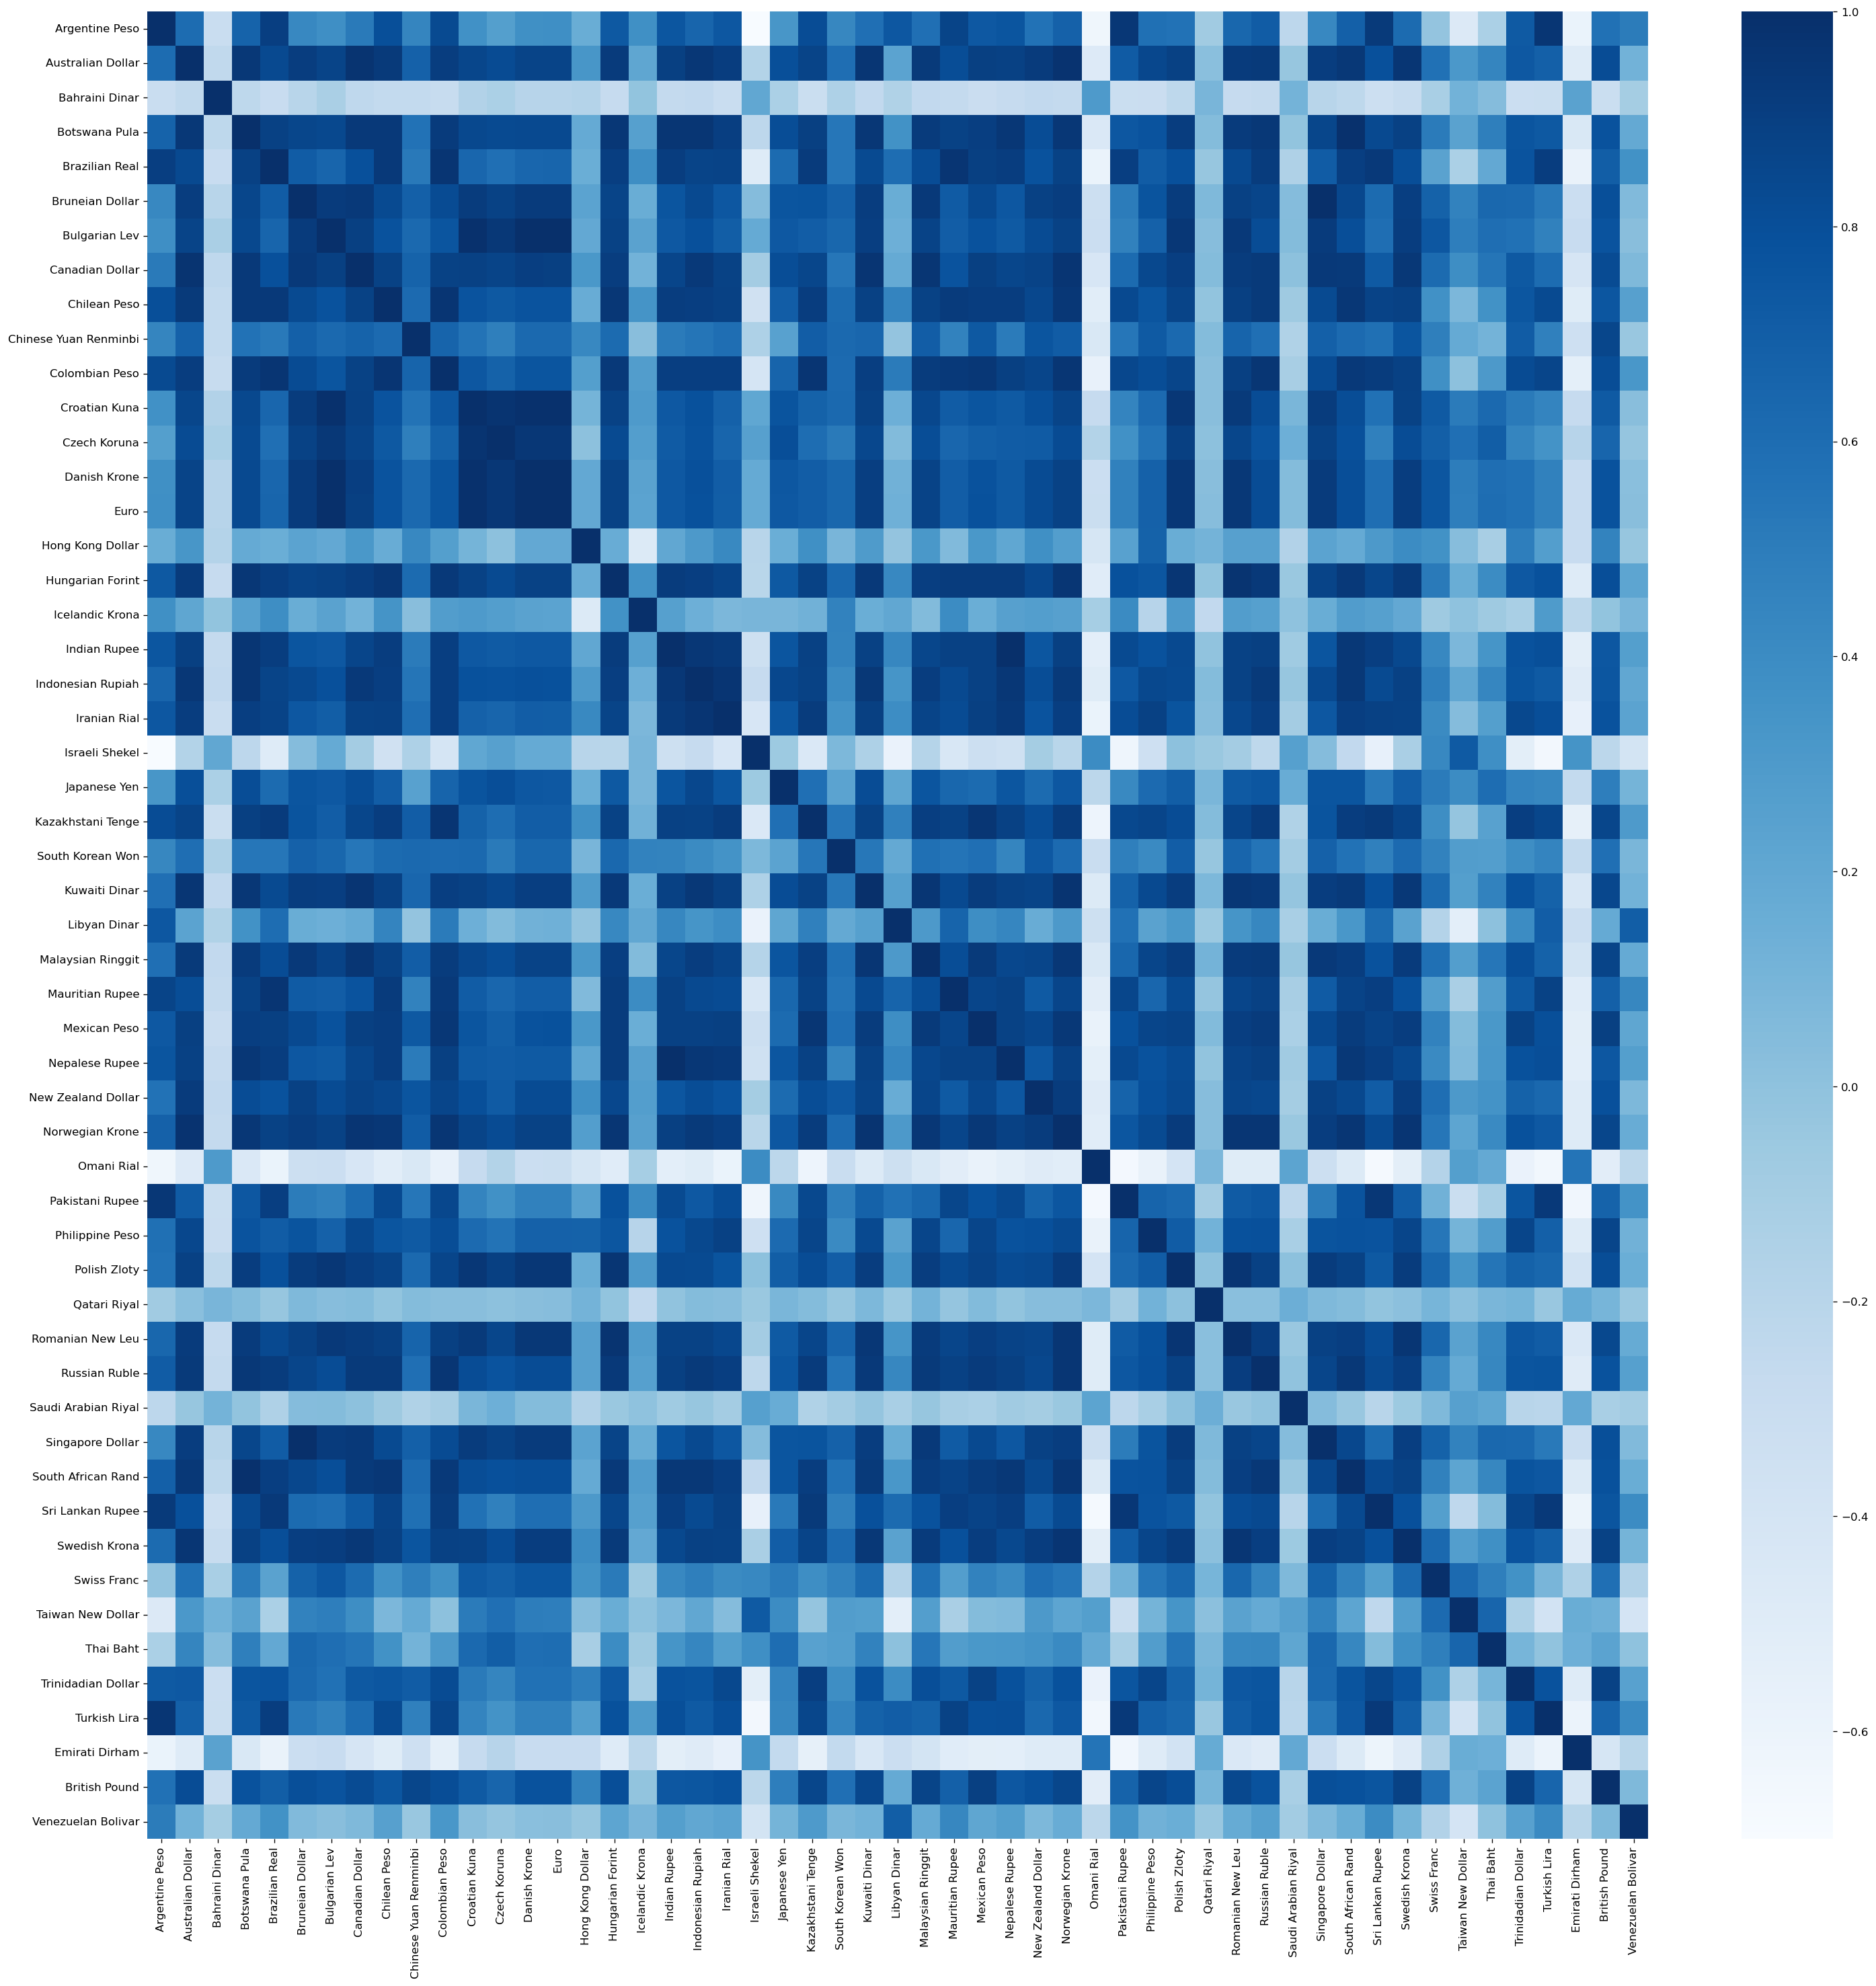

In [284]:
corr = data.corr()

plt.figure(figsize = (30, 30))
sn.heatmap(corr, annot = False, cmap = 'Blues')
plt.show()

# Analyse locale

### Analyses numériques par catégories

Comme il est impossible de traiter les 54 monnaies du datasets en profondeur, on choisit trois monnaies que nous allons étudier en détail : le Dollar canadien, le Dollar australien et l'Euro.

Récupération de l'indice de la colonne du dataset correspondant à chaque monnaie.

In [285]:
peso = data.columns.get_loc('Canadian Dollar')
print(peso)
euro = data.columns.get_loc('Euro')
print(euro)
canadian_dollar = data.columns.get_loc('Canadian Dollar')
print(canadian_dollar)

8
15
8


Réalisons en premier lieu une analyse de surface de chaque monnaie. Cette démarche permet d'obtenir le nombre de valeurs, la moyenne, l'écart-type, la valeur minimale, les quartiles, la médiane et la valeur maximale.

- Cas du Dollar canadien (valeur en USD)

In [286]:
data['Canadian Dollar'].describe()

count    4025.000000
mean        1.204216
std         0.138987
min         0.944200
25%         1.046887
50%         1.263332
75%         1.317425
max         1.458843
Name: Canadian Dollar, dtype: float64

Pour approfondir notre compréhension de la dispersion des valeurs du Dollar canadien en dollars USD, on peut également tracer le box plot des valeurs depuis 2011.

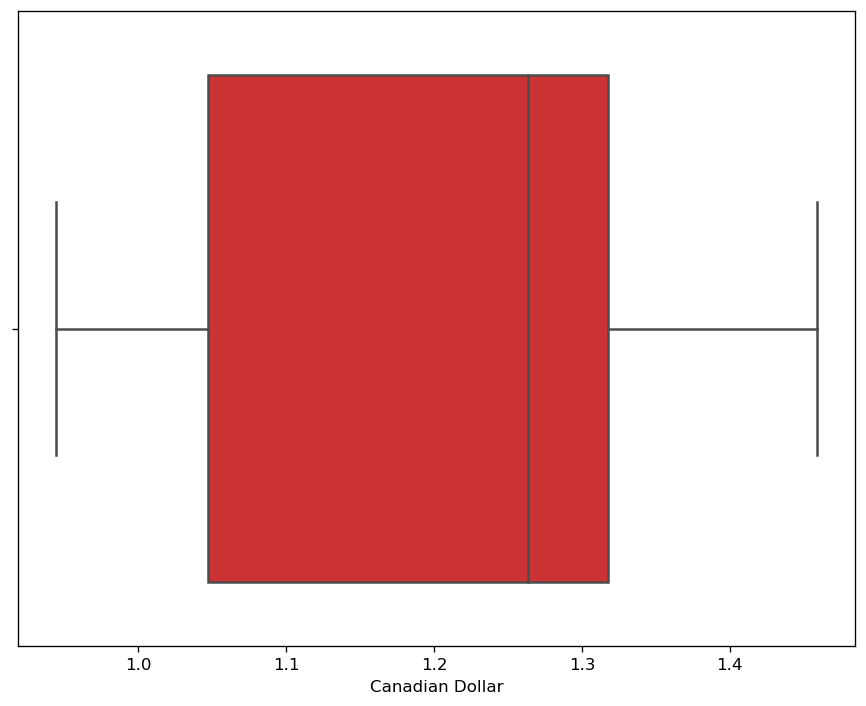

In [287]:
sn.boxplot(data['Canadian Dollar'], palette = 'Set1')
plt.show()

- Cas du Dollar australien (valeur en USD)

In [288]:
data['Australian Dollar'].describe()

count    4025.000000
mean        1.239292
std         0.180890
min         0.907009
25%         1.067558
50%         1.302860
75%         1.378220
max         1.739537
Name: Australian Dollar, dtype: float64

On trace le boxplot du dollar australien :

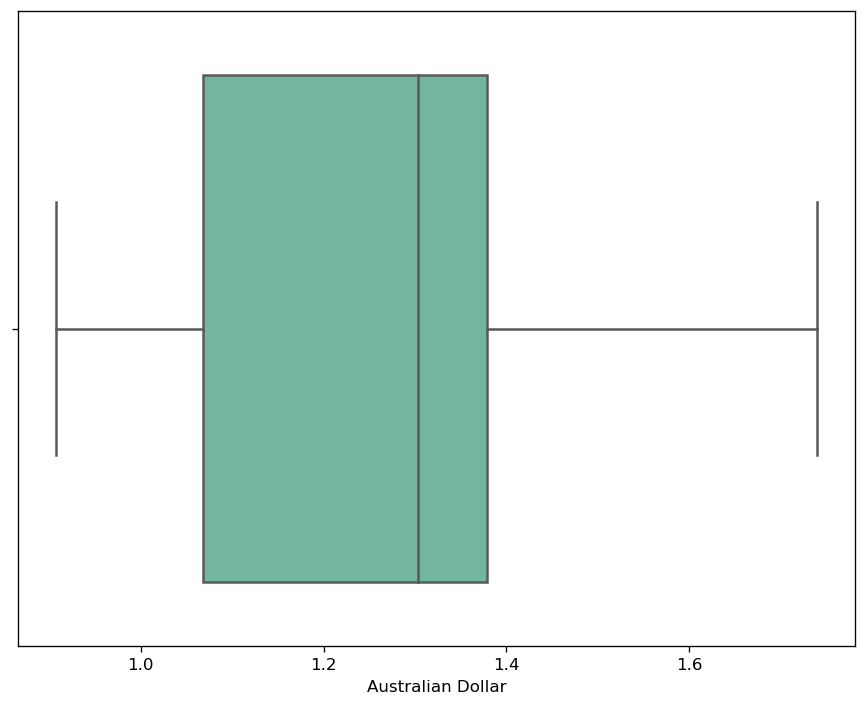

In [289]:
sn.boxplot(data['Australian Dollar'], palette = 'Set2')
plt.show()

- Cas de l'Euro :

In [290]:
data['Euro'].describe()

count    4025.000000
mean        0.832933
std         0.070266
min         0.672338
25%         0.766372
50%         0.847364
75%         0.891919
max         0.964053
Name: Euro, dtype: float64

On dessine à présent le boxplot de l'euro :

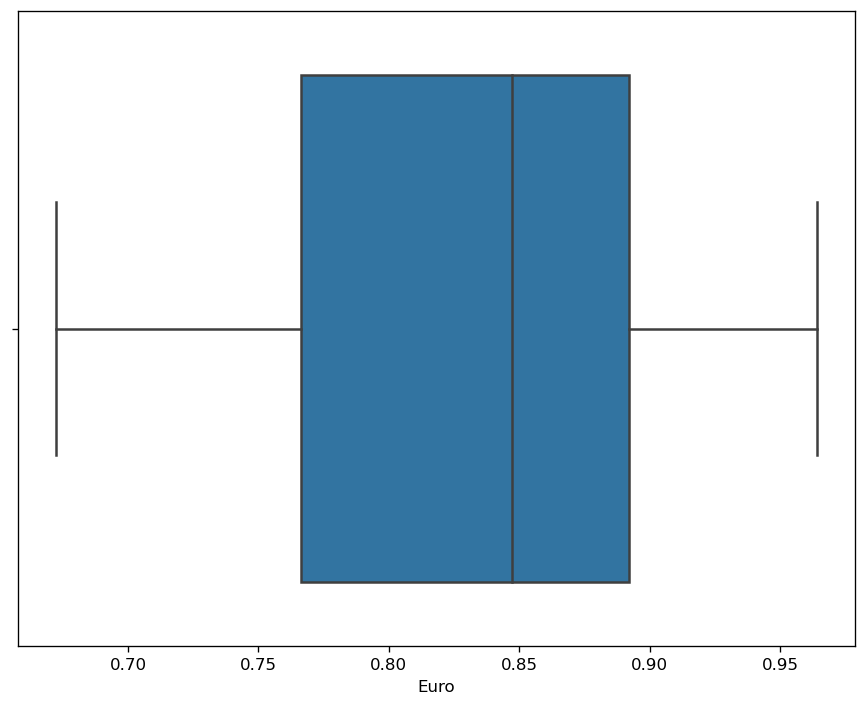

In [291]:
sn.boxplot(data['Euro'])
plt.show()

## Analyses graphiques

- Modélisation des évolutions

Après avoir réalisé une analyse de surface de chacune des trois monnaies, on peut commencer par tracer l'évolution au cours du temps de la valeur de chacune d'elles en termes d'USD.

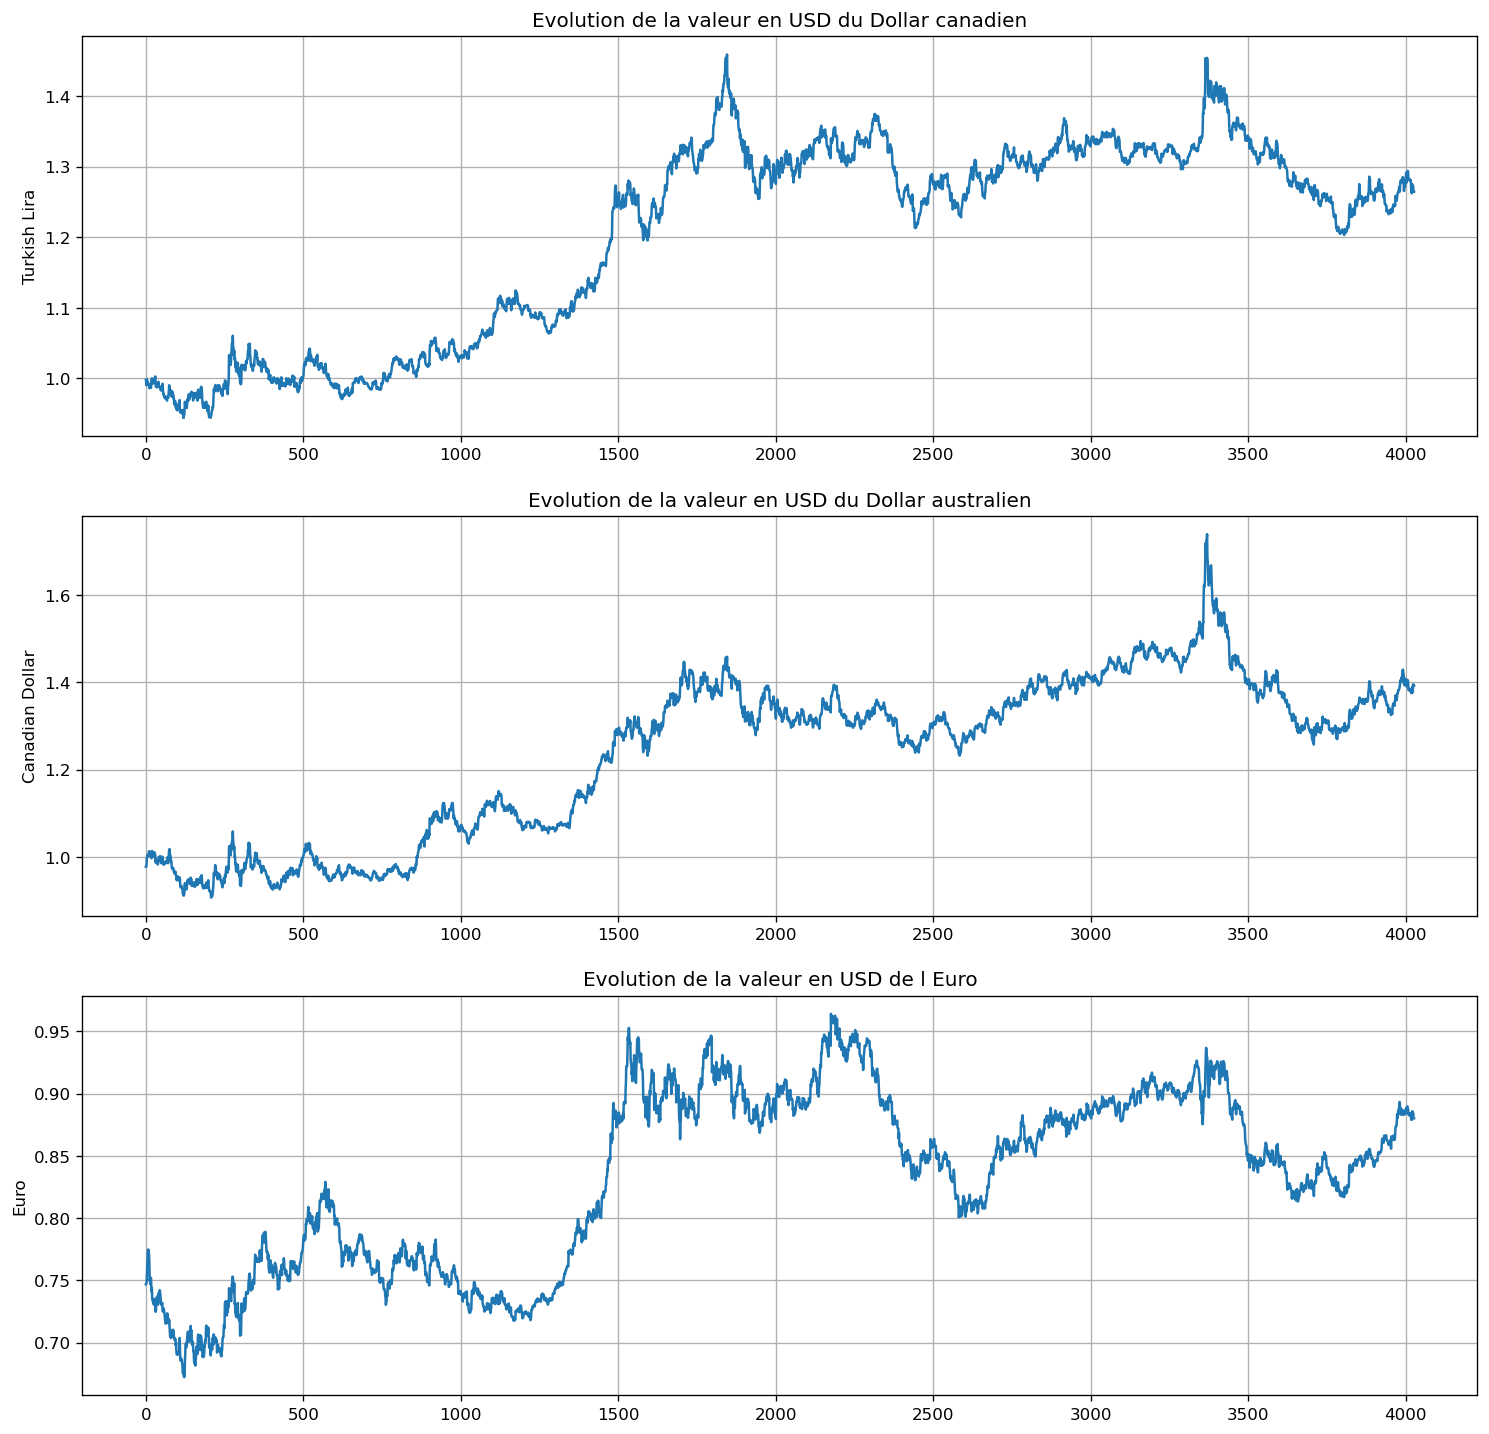

In [327]:
countries = list(data.columns)
index = list(range(len(data[countries[0]])))

X1 = data['Canadian Dollar']
X2 = data['Australian Dollar']
X3 = data['Euro']

Y1 = (X1,X2) #Dollar canadien et Dollar australien
Y2 = (X2,X3) #Dollar australien et Euro
Y3 = (X3,X1) #Euro et Dollar canadien

covY1 = np.cov(Y1)
covY2 = np.cov(Y2)
covY3 = np.cov(Y3)

plt.figure(figsize=(15,15))
plt.subplot(311)
plt.grid()
plt.title('Evolution de la valeur en USD du Dollar canadien')
plt.ylabel('Turkish Lira')
plt.plot(X1)

plt.subplot(312)
plt.grid()
plt.title('Evolution de la valeur en USD du Dollar australien')
plt.ylabel('Canadian Dollar')
plt.plot(X2)

plt.subplot(313)
plt.grid()
plt.title('Evolution de la valeur en USD de l Euro')
plt.ylabel('Euro')
plt.plot(X3)
plt.show()


- Visualisation par histogrammes

On trace à présent les histogrammes ainsi que la ddp.

<AxesSubplot:xlabel='Euro', ylabel='Density'>

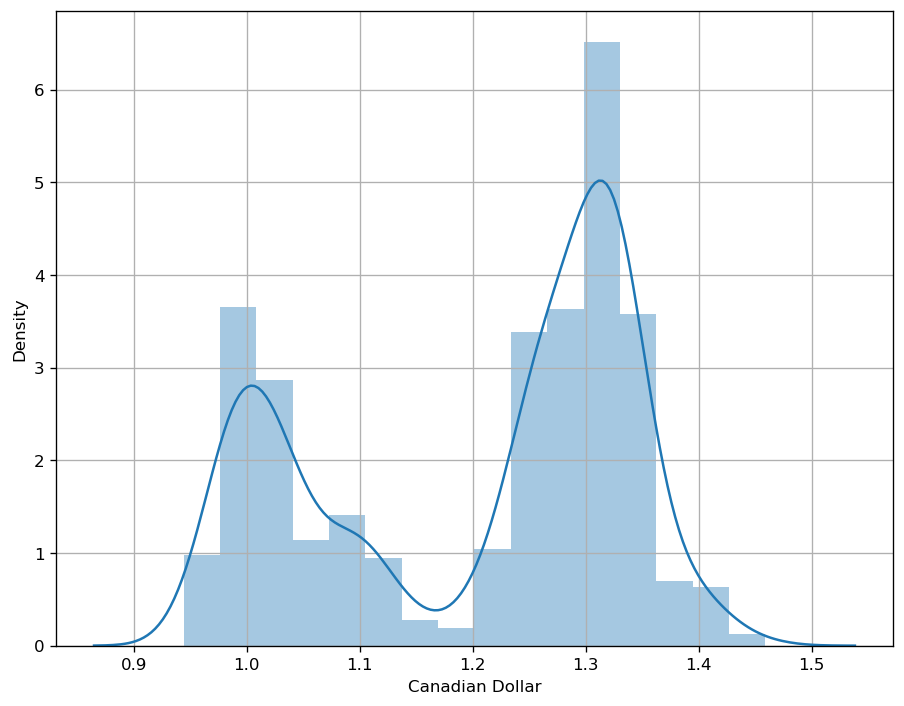

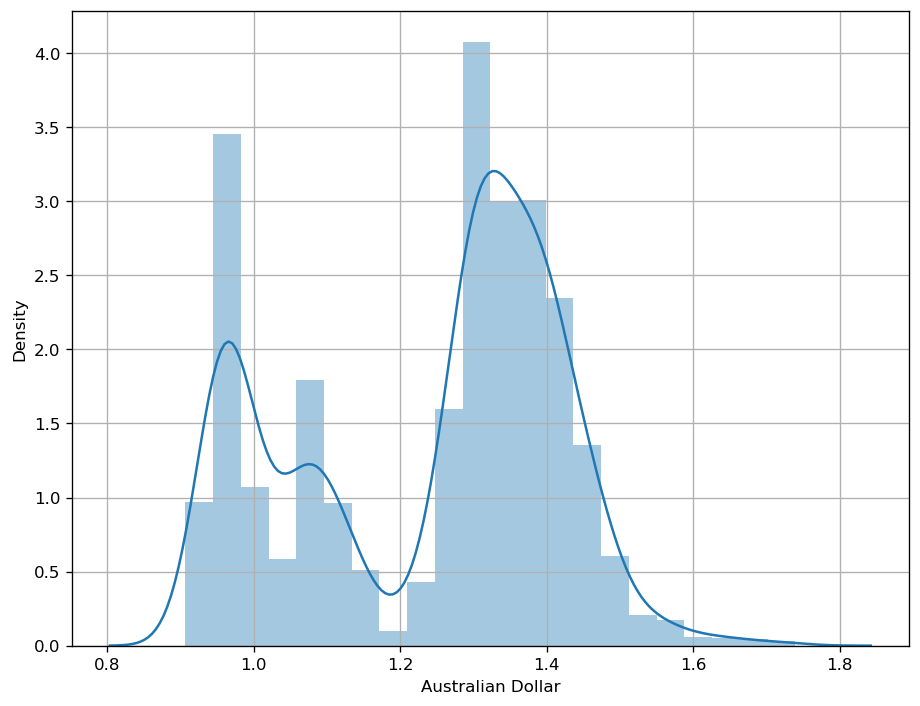

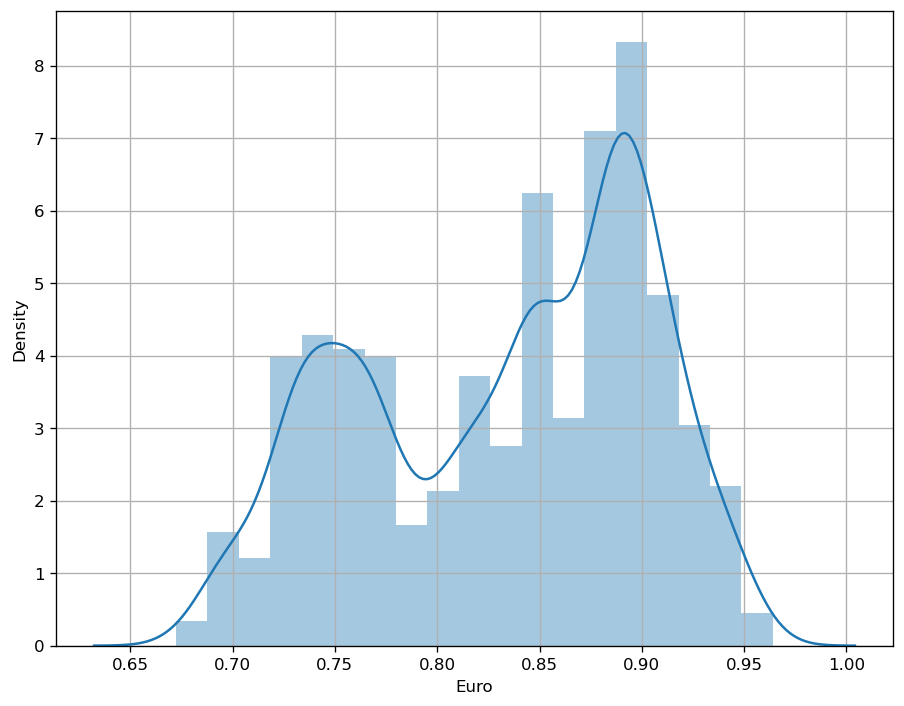

In [329]:
plt.figure()
plt.grid()
sn.distplot(data['Canadian Dollar'])

plt.figure()
plt.grid()
sn.distplot(data['Australian Dollar'])

plt.figure()
plt.grid()
sn.distplot(data['Euro'])

On constate qu'aucune des trois monnaies ne forme de gaussiennes en cloche parfaite. A la rigueur, les deuxièmes sections des Dollars australien et canadien peuvent s'apparenter à une gaussienne, mais ce n'est pas du tout le cas pour l'euro.

- Histogrammes bivariés

On dessine à présent les histogrammes bivariés pour voir la relation entre les variables (deux à deux).

In [294]:
def drawPlot(Y,title):
    fig = plt.figure()
    fig.suptitle(title)
    ax = fig.add_subplot(111, projection='3d')
    (x, y) = Y
    hist, xedges, yedges = np.histogram2d(x, y, bins=25, range=[[min(Y[0]), max(Y[0])], [min(Y[1]), max(Y[1])]])
    
    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    
    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

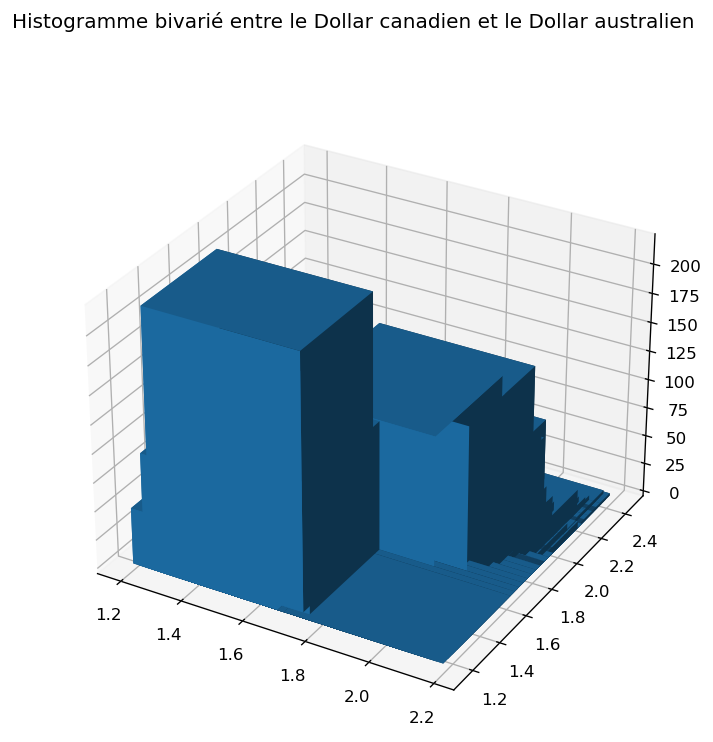

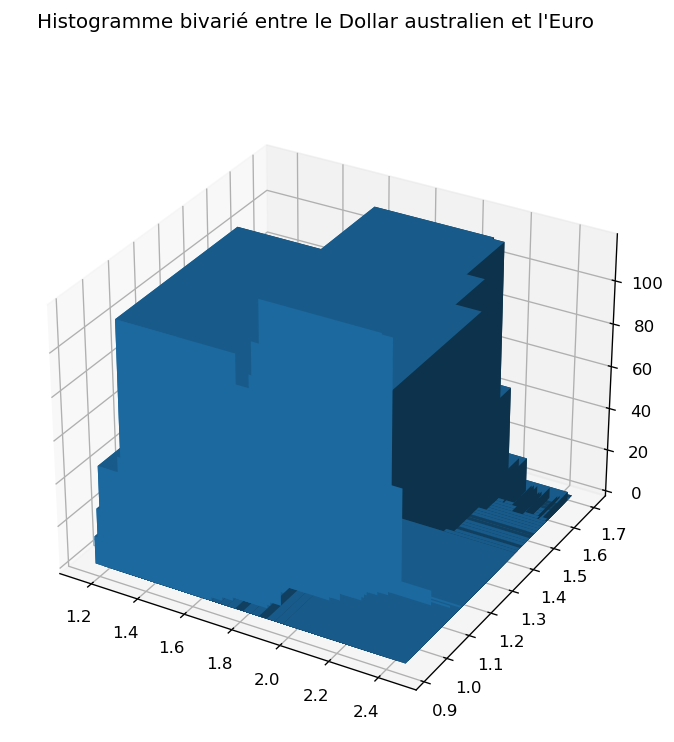

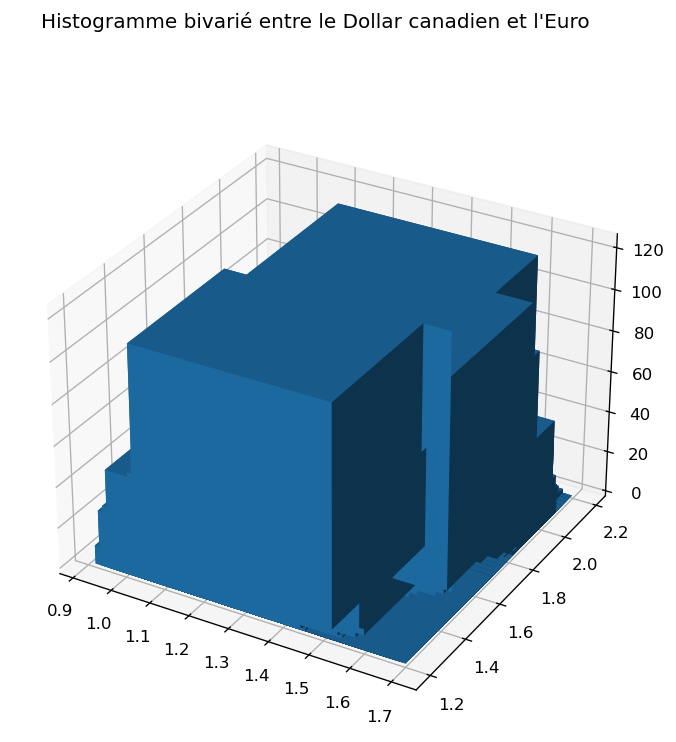

In [295]:
drawPlot(Y1,"Histogramme bivarié entre le Dollar canadien et le Dollar australien")
drawPlot(Y2,"Histogramme bivarié entre le Dollar australien et l'Euro")
drawPlot(Y3,"Histogramme bivarié entre le Dollar canadien et l'Euro")

- Pair plot

On dessine à présent le pair plot pour voir les liens entre les variables. Il s'appuie sur deux figures de base, l'histogramme et le nuage de points. L'histogramme sur la diagonale nous permet de voir la distribution d'une seule variable tandis que les nuages ​​de points sur les triangles supérieur et inférieur montrent la relation (ou son absence) entre deux variables.

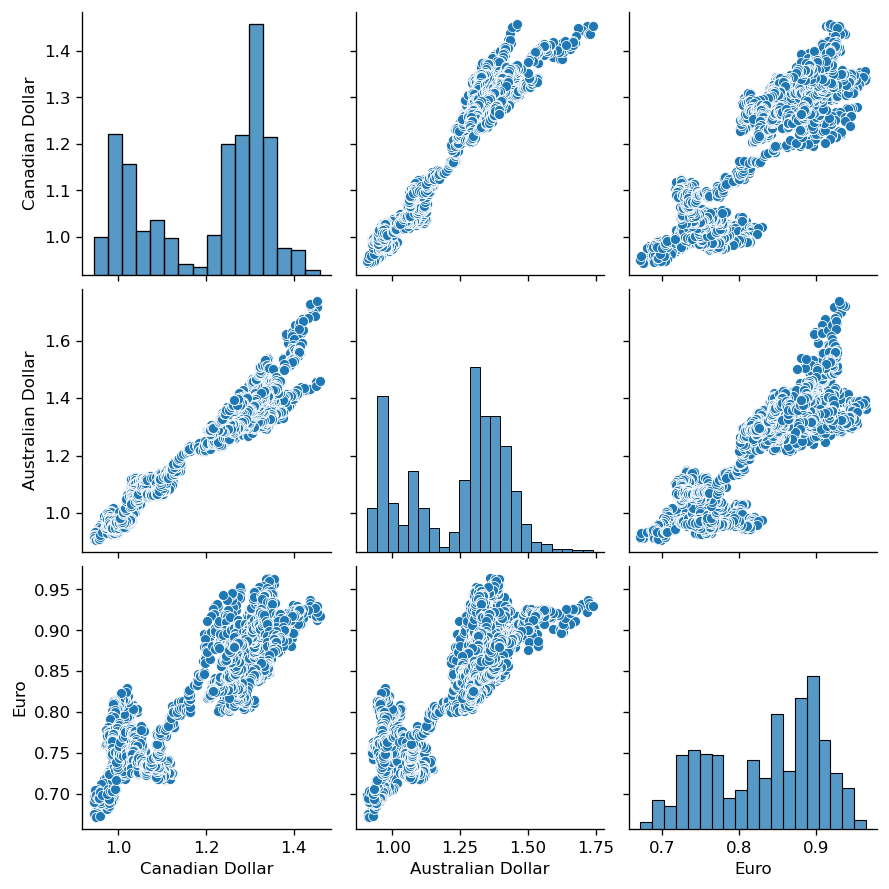

In [296]:
sn.pairplot(data = data, vars = ['Canadian Dollar', 'Australian Dollar', 'Euro'])
plt.show()

On construit la matrice de corrélation entre le dollar canadien, l'euro et le dollar australien pour observer la relation entre les trois monnaies car celle-ci ne peut pas être observée sur un graphe.

                   Canadian Dollar  Australian Dollar      Euro
Canadian Dollar           1.000000           0.968551  0.900089
Australian Dollar         0.968551           1.000000  0.870212
Euro                      0.900089           0.870212  1.000000


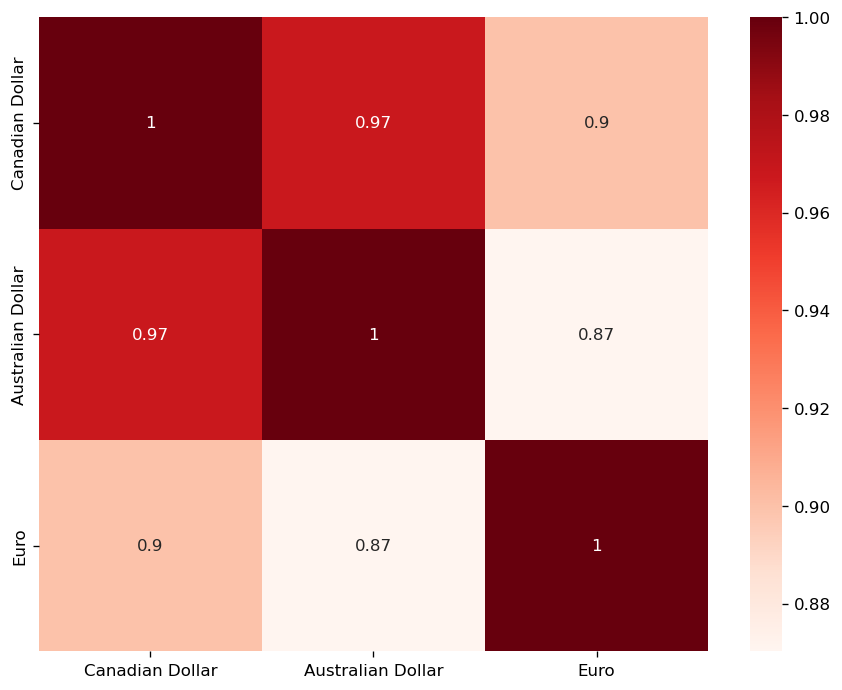

In [297]:
#Creation d'une matrice avec le dollar canadien, le dollar australien et l'euro
corr_mat = data[['Canadian Dollar', 'Australian Dollar', 'Euro']].corr()
print(corr_mat)

sn.heatmap(corr_mat, annot = True, cmap = 'Reds')
plt.show()

D'après la matrice, on observe quand même une corrélation élevée entre les variables.

## Détection de changement : méthode par entropie relative

On écrit une fonction entropie_relative qui va se charger de modéliser l'entropie relative de trois monnaies dans l'ordre, avec un pas de 150.

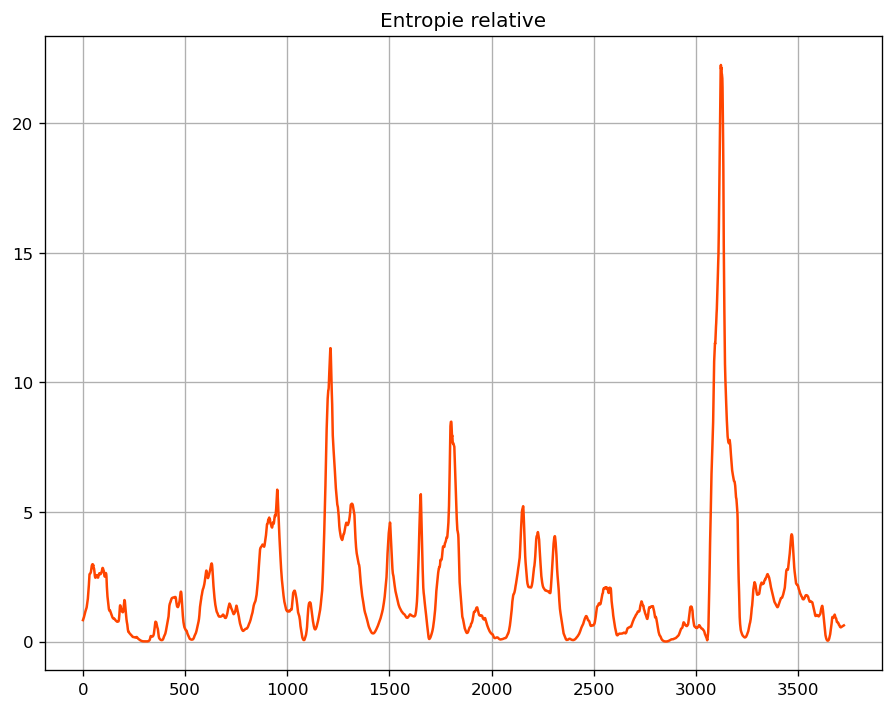

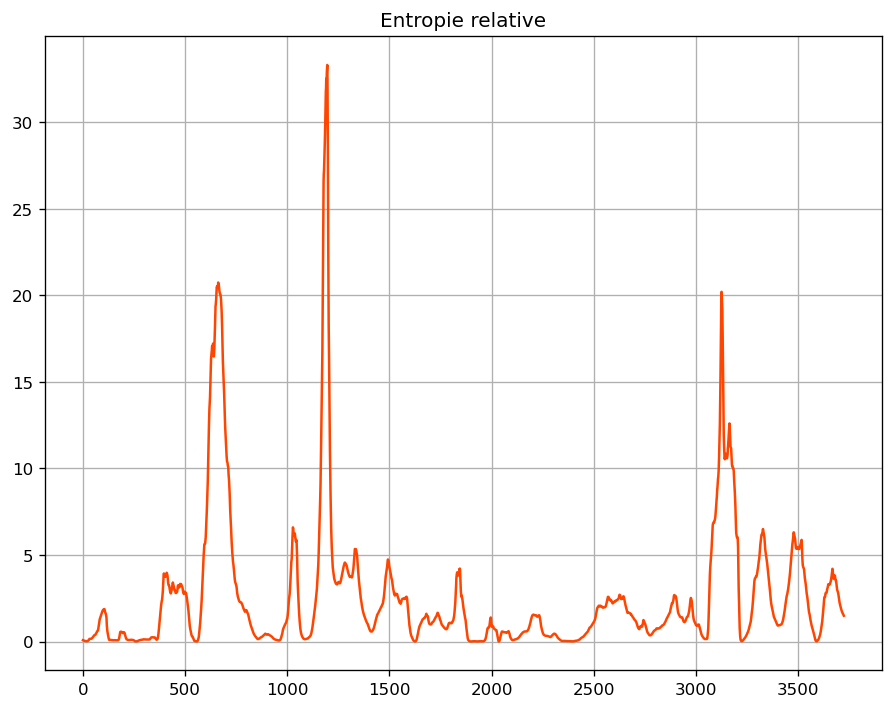

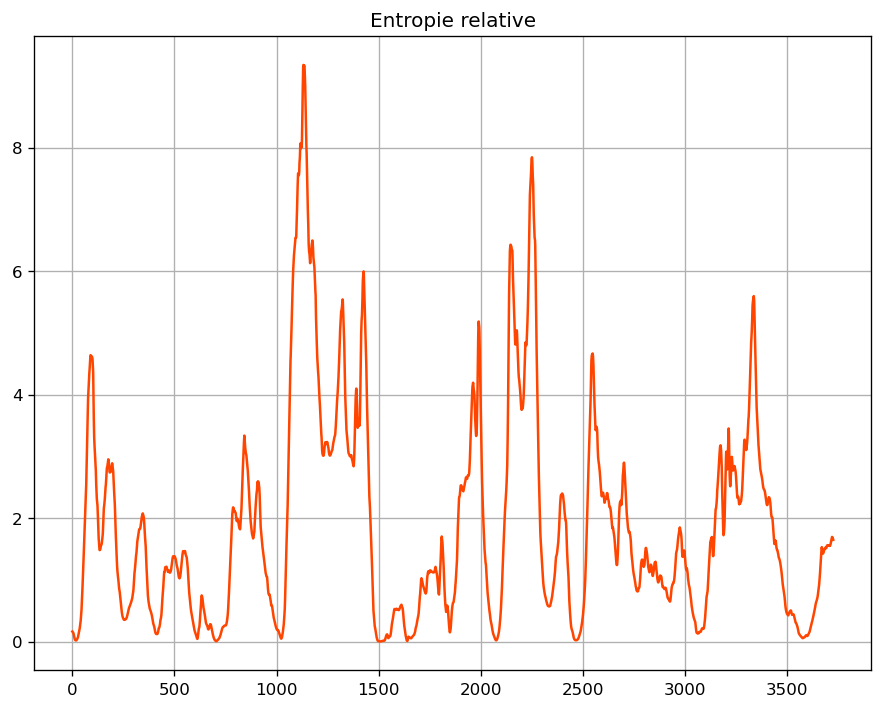

In [332]:
pas = 150

def entropie_relative(currency1, currency2, currency3):
    for X in [data[currency1], data[currency2], data[currency3]]:
        total_entropy = []
        iteration = 0
        while iteration+pas*2 != len(data[currency1])+1 :
    
            firstSet = X[iteration:iteration+pas-1]
            secondSet = X[iteration+pas:iteration+pas*2]
        
            #print(iteration+pas*2)
        
            firstSetMean = np.mean(firstSet)
            secondSetMean = np.mean(secondSet)
        
            firstSetVar = (np.std(firstSet))
            secondSetVar = (np.std(secondSet))
        
            part1 = ((firstSetMean - secondSetMean)**2)/(firstSetVar**2+secondSetVar**2)
            part2 = ((firstSetVar**2)/(secondSetVar**2))+((secondSetVar**2)/(firstSetVar**2))
        
            entropy = (1/2)*part1 + (1/2)*part2 - 1
        
            total_entropy.append(entropy)
            iteration += 1
        plt.plot(total_entropy, color = "orangered")
        plt.grid()
        plt.title("Entropie relative")
        plt.show()

entropie_relative('Canadian Dollar', 'Australian Dollar', 'Euro')

On peut dire que les fluctuations des entropies relatives sont plus ou moins stables, hormis cinq pics notoires au cours du temps qui correspondent à un changement brusque dans l'évolution des cours.

## Prédiction de tendances par modèle ARIMA

La méthode ARIMA (AutoRegressive Moving Average) est une des méthodes de prévision les plus répandues. Elle prédit les valeurs futures d'une série temporelle sur certains aspects de la structure statistique de la série observée. ARIMA combine les modèles auto-régressifs et les moyennes glissantes.

ARIMA possède trois paramètres correspondant à chaque composante du modèle :
- p : nombre de décalages à considérer pour le modèle AR 
- d : nombre de fois où il faut différencier la série pour la rendre stationnaire
- q : ordre du modèle MA 

On commence par écrire trois fonctions qui permettent de réaliser nos prédictions.

La fonction pCondition permet de procéder au début du test Dickey Fuller augmenté (test ADF), qui est utilisé pour tester si une série temporelle donnée est stationnaire ou non, notamment en donnant la valeur du coefficient p. Celui-ci détermine si la série est stationnaire ou non : si il est supérieur à 0, 55 alors la fonction est non stationnaire, et inversement. 

In [299]:
def pCondition(country):
    result = adfuller(data[country])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    return result[1]

Selon la valeur du coeffcient p obtenu, la fonction Differencing procède à une série de quatre différentiations pour s'approcher au maximum d'un processus stationnaire.

In [300]:
def Differencing(country):
    datalimit = len(data[country])
    plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

    # Original Series
    fig, axes = plt.subplots(5, 2, sharex=True)
    axes[0, 0].plot(data[country][:datalimit]); axes[0, 0].set_title('Original Series')
    plot_acf(data[country][:datalimit], ax=axes[0, 1])

    # 1st Differencing
    axes[1, 0].plot(data[country][:datalimit].diff()); axes[1, 0].set_title('1st Order Differencing')
    plot_acf(data[country][:datalimit].diff().dropna(), ax=axes[1, 1])

    # 2nd Differencing
    axes[2, 0].plot(data[country][:datalimit].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(data[country][:datalimit].diff().diff().dropna(), ax=axes[2, 1])


    # 3nd Differencing
    axes[3, 0].plot(data[country][:datalimit].diff().diff().diff()); axes[3, 0].set_title('3nd Order Differencing')
    plot_acf(data[country][:datalimit].diff().diff().diff().dropna(), ax=axes[3, 1])

    # 4nd Differencing
    axes[4, 0].plot(data[country][:datalimit].diff().diff().diff().diff()); axes[4, 0].set_title('4nd Order Differencing')
    plot_acf(data[country][:datalimit].diff().diff().diff().diff().dropna(), ax=axes[4, 1])


    plt.show()

La fonction getDifferences retourne le nombre théorique de différentiations à effectuer pour rendre la série stationnaire.

In [301]:
def getDifferences(country):
    return ndiffs(data[country], test='adf') 


La fonction getP permet de déterminer p graphiquement.

In [302]:
# PACF plot of 1st differenced series
def getP(country):
    
    fig, axes = plt.subplots(2, 2, sharex=True)
    axes[0,0].plot(data[country].diff()); axes[0,0].set_title('1st Differencing')
    axes[0,1].set(ylim=(0,5))
    plot_pacf(data[country].diff().dropna(), ax=axes[0,1])

    axes[1,0].plot(data[country].diff().diff()); axes[1,0].set_title('1st Differencing')
    axes[1,1].set(ylim=(0,5))
    plot_pacf(data[country].diff().diff().dropna(), ax=axes[1,1])
    
    plt.show()

La fonction getQ permet de déterminer q graphiquement.

In [303]:
def getQ(country):
    fig, axes = plt.subplots(4, 2, sharex=True)
    axes[0,0].plot(data[country].diff()); axes[0,0].set_title('1st Differencing')
    axes[0,1].set(ylim=(0,1.2))
    plot_acf(data[country].diff().dropna(), ax=axes[0,1])

    axes[1,0].plot(data[country].diff().diff())
    axes[1,1].set(ylim=(0,1.2))
    plot_acf(data[country].diff().diff().dropna(), ax=axes[1,1])

    axes[2,0].plot(data[country].diff().diff().diff())
    axes[2,1].set(ylim=(0,1.2))
    plot_acf(data[country].diff().diff().dropna(), ax=axes[2,1])

    axes[3,0].plot(data[country].diff().diff().diff())
    axes[3,1].set(ylim=(0,1.2))
    plot_acf(data[country].diff().diff().diff().dropna(), ax=axes[3,1])

    plt.show()



La fonction prediction prend en paramètre une monnaie du dataset ainsi que les paramètres p, d et q. Ensuite, elle réalise une prédiction de l'évolution des cours en se basant sur les valeurs précédentes.

In [304]:

def prediction(country,p,d,q):
    countries = list(data.columns)
    index = list(range(len(data[countries[0]])))
    train = data[country][:3000]
    test = data[country][3000:]
    model = ARIMA(train,order=(p,d,q))
    fitted = model.fit()
    #Forecast
    fc, se, conf = fitted.forecast(1025, alpha=0.05)  # 95% conf

    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                    color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()


- Cas du Dollar canadien

In [305]:
pCondition('Canadian Dollar')

ADF Statistic: -1.567367
p-value: 0.499962


0.499962206968784

La valeur de p montre qu'il n'y a besoin de différencier qu'une seule fois.

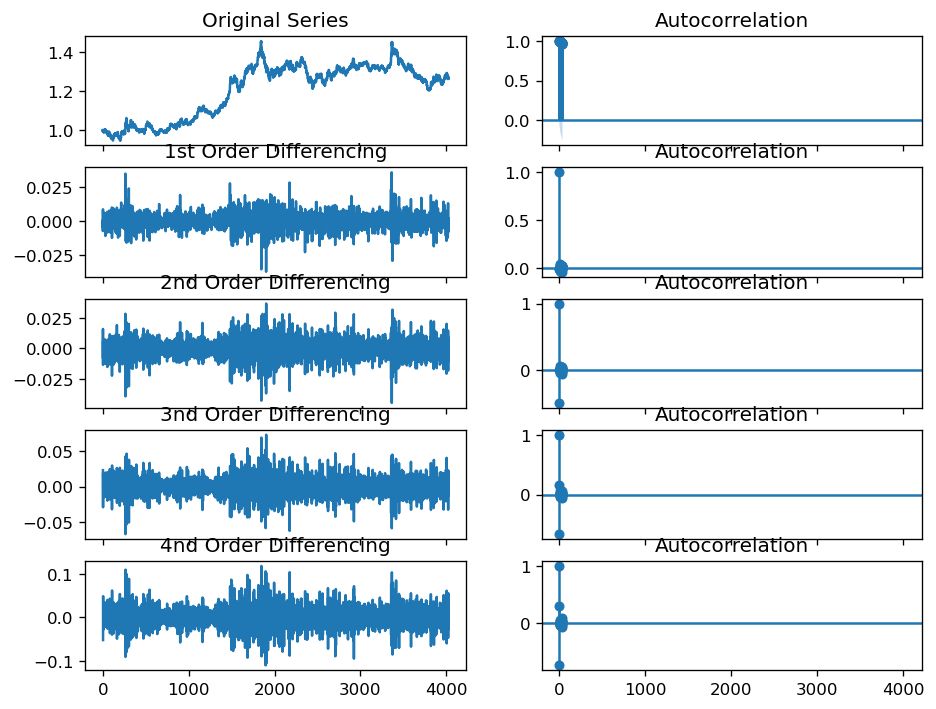

In [306]:
Differencing('Canadian Dollar')

In [307]:
d = getDifferences("Canadian Dollar")
print(d)

1


d vaut bien 1, donc on ne différentie qu'une seule fois.

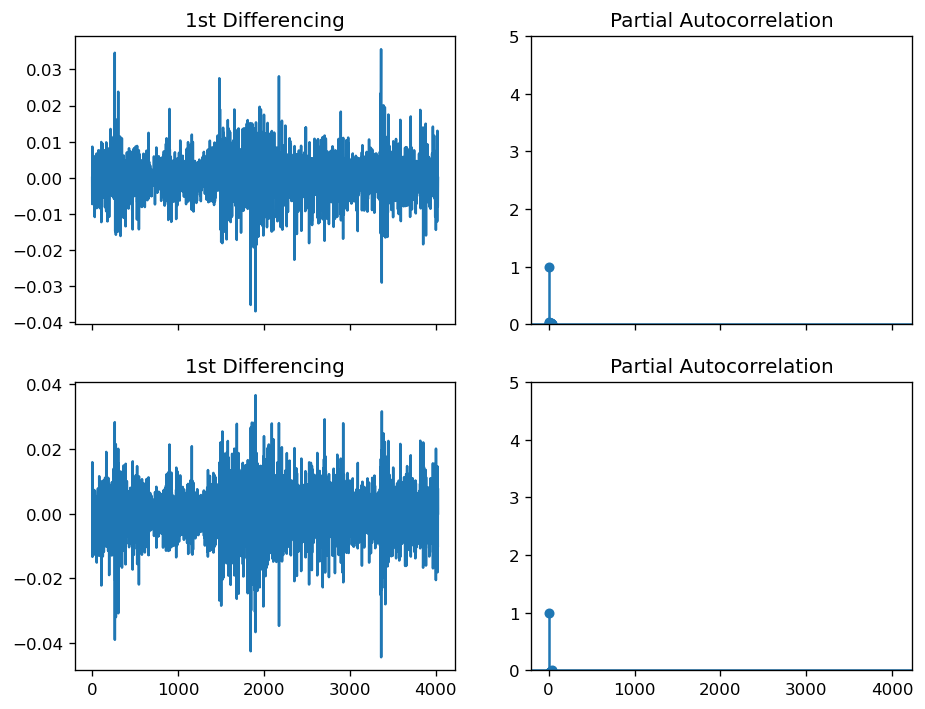

In [308]:
getP("Canadian Dollar")

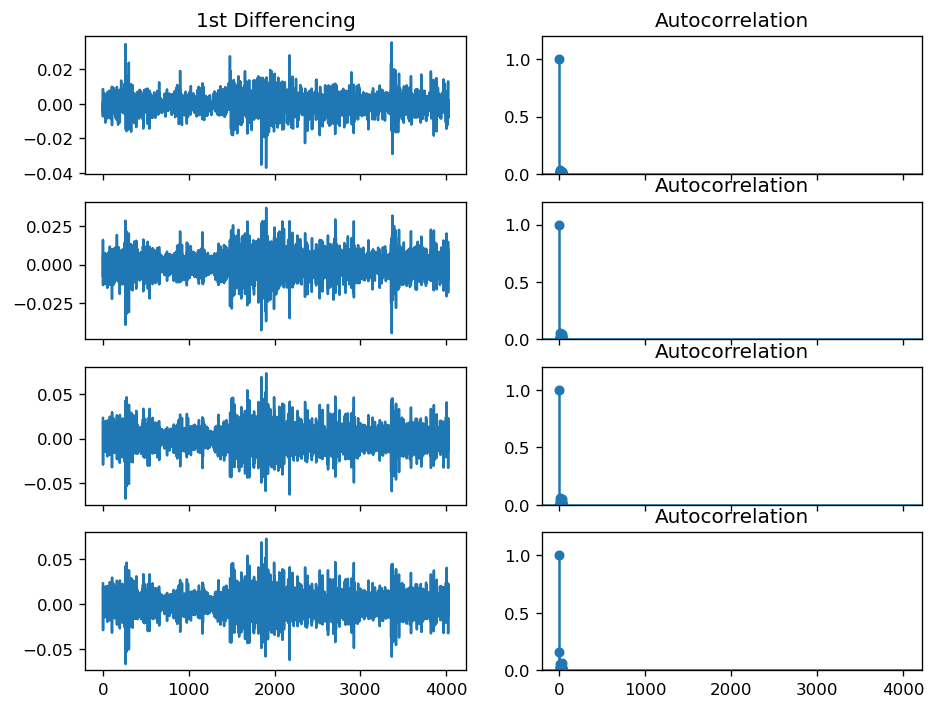

In [309]:
p=1
getQ("Canadian Dollar")

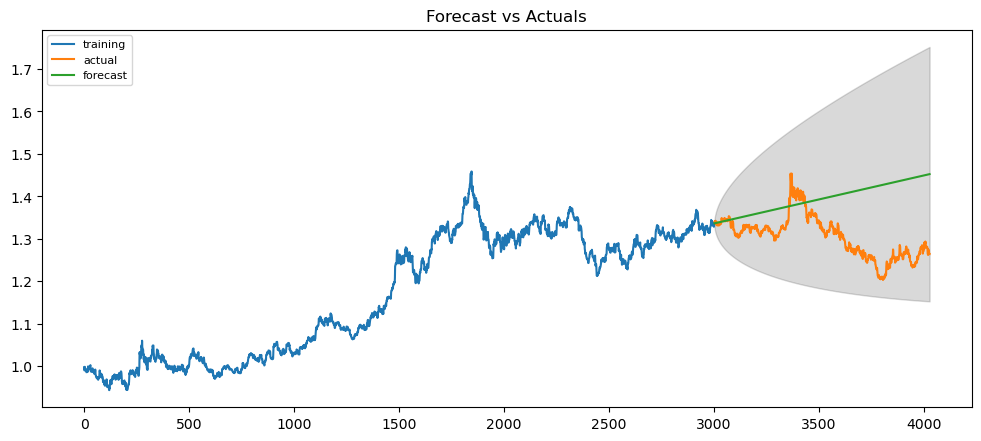

In [310]:
q=1
prediction("Canadian Dollar",p,d,q)

- Cas du Dollar australien

In [311]:
# "Australian Dollar"
Pvalue=pCondition("Australian Dollar")

ADF Statistic: -1.329724
p-value: 0.615466


1


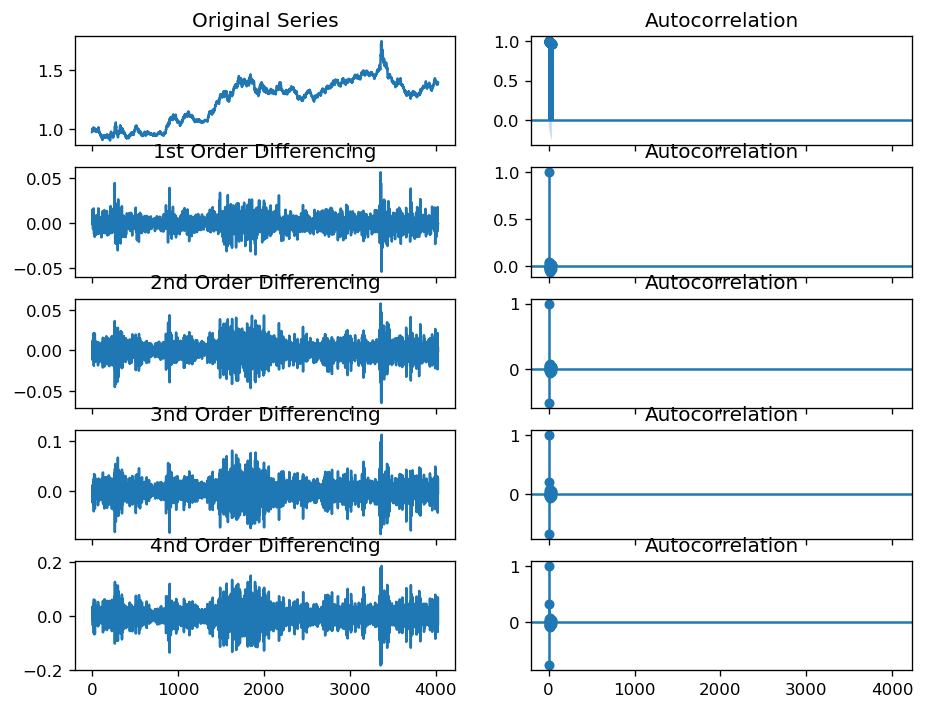

In [312]:
d=getDifferences("Australian Dollar")
print(d)
Differencing("Australian Dollar")

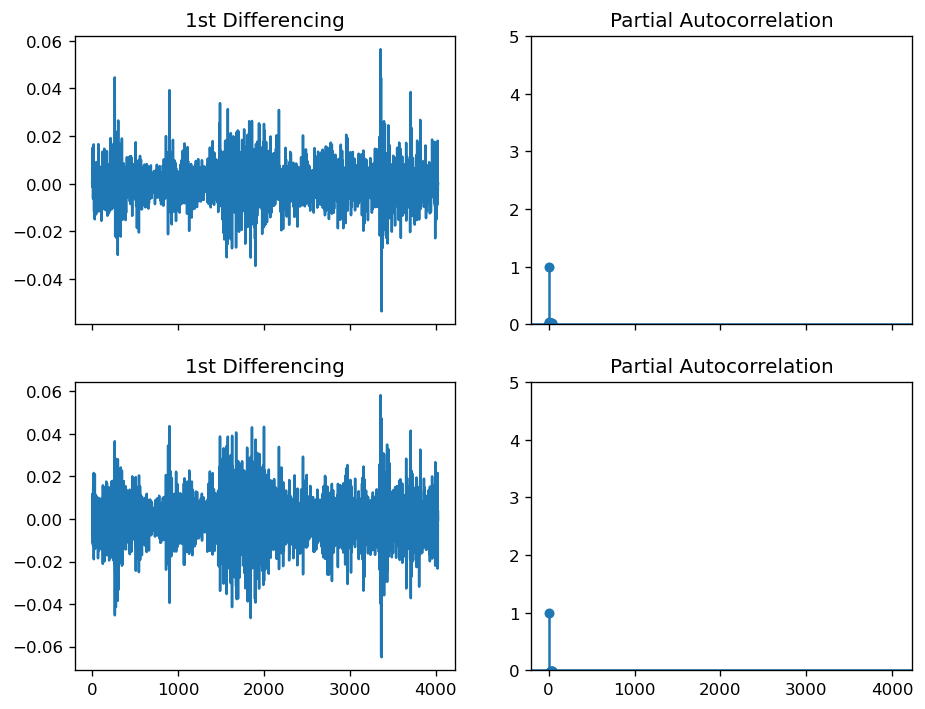

In [313]:
getP("Australian Dollar")


Comme prévu, les graphes permettent de conclure que p = 1.

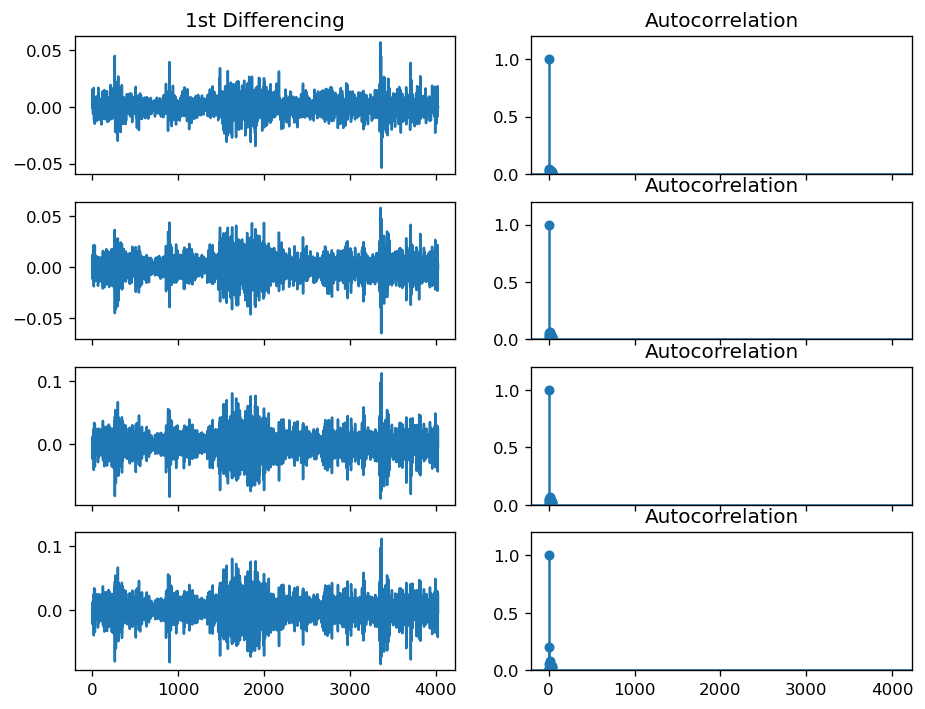

In [314]:
p=1
getQ("Australian Dollar")

Comme prévu, les graphes permettent de conclure que p = 1.

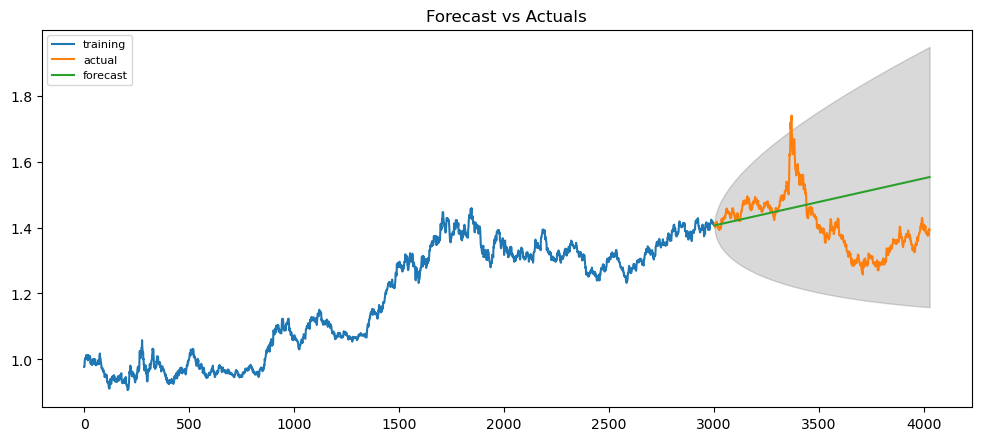

In [315]:
q=1
prediction("Australian Dollar",p,d,q)

- Cas de l'Euro

1


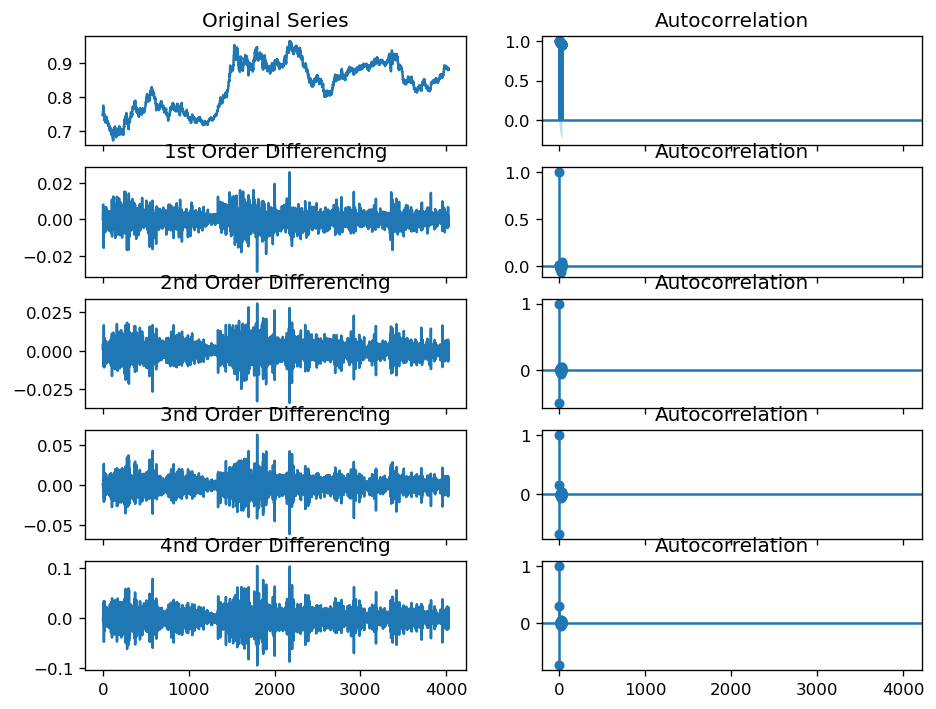

In [316]:
money='Euro'

d=getDifferences(money)
print(d)
Differencing(money)

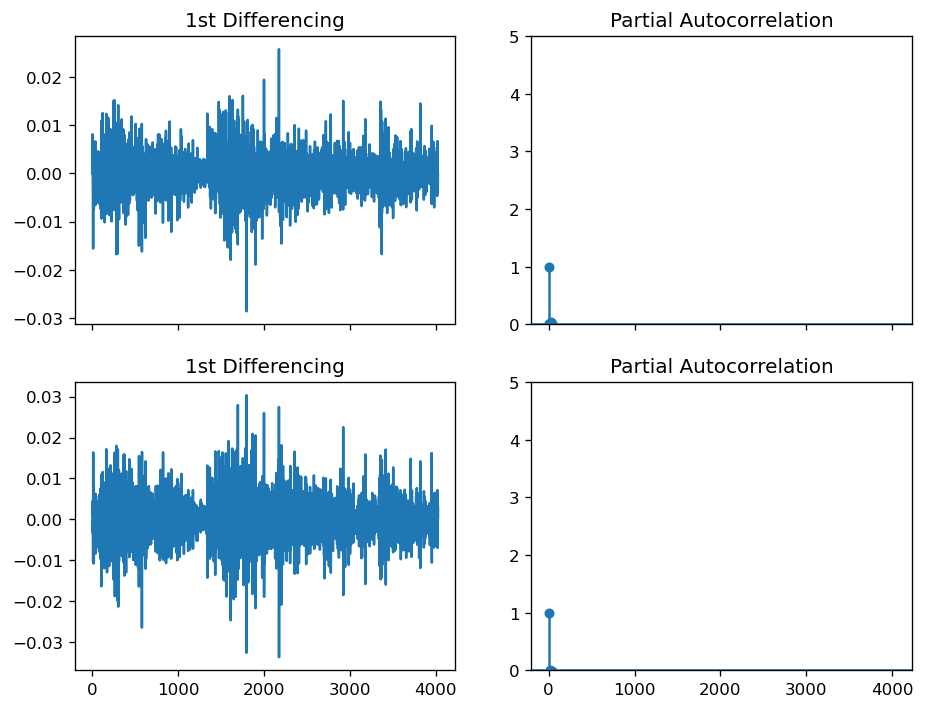

In [324]:
d=1
getP(money)

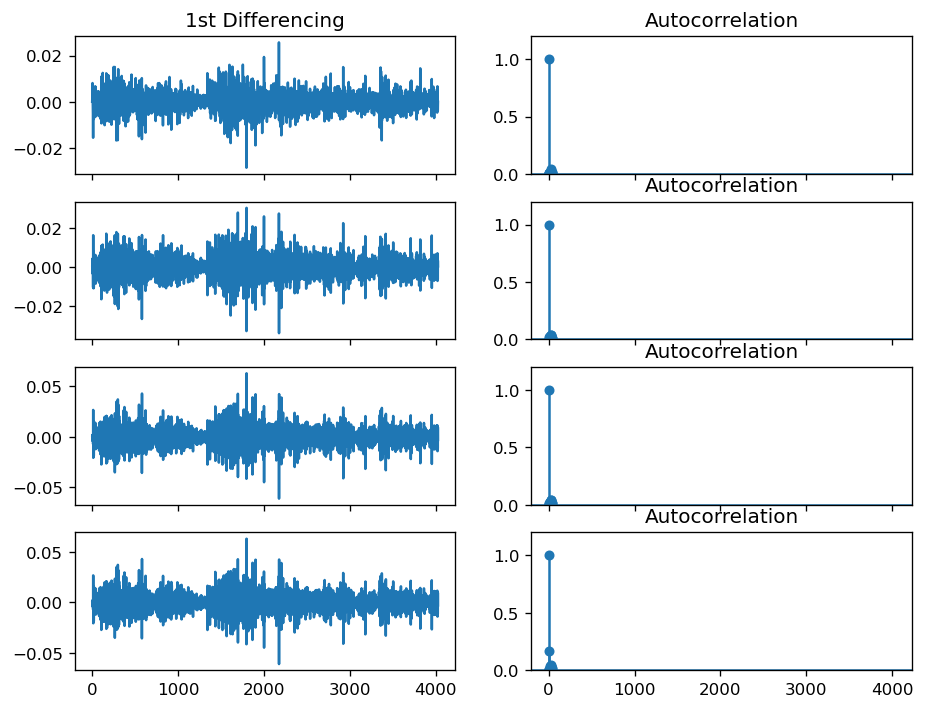

In [325]:
p=1
getQ(money)

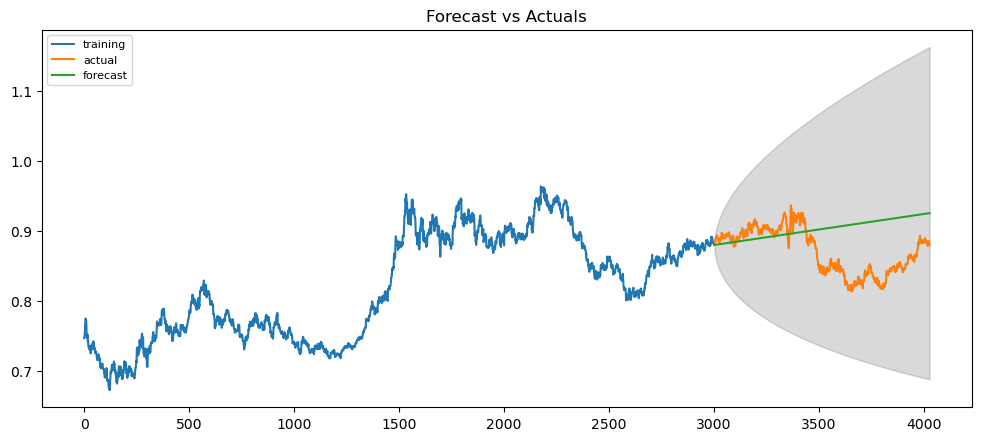

In [319]:
q=1
prediction(money,p,d,q)